In [2]:
import cv2 
import numpy as np

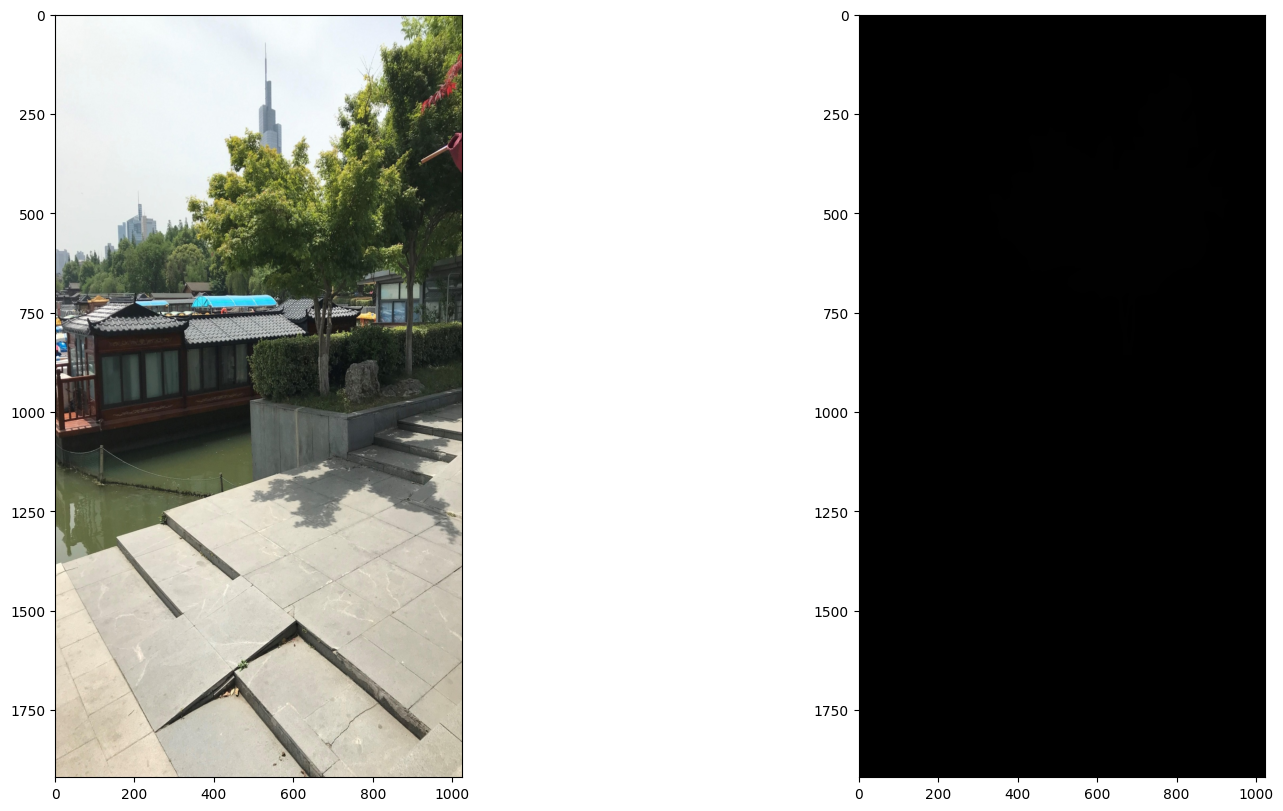

In [3]:

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "/home/hamster02/courses/ugp_1/Motion_induction/tree/VOCdevkit/VOC2012/JPEGImages/Acer palmatum_tree_1 (1).jpg"
label_image_semantic = "/home/hamster02/courses/ugp_1/Motion_induction/tree/VOCdevkit/VOC2012/SegmentationClass/Acer palmatum_tree_1 (1).png"

# img.    
fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)
label_image_semantic = np.asarray(label_image_semantic)



In [6]:
kaggle_commit = True

epochs = 20
if kaggle_commit:
    epochs = 10

In [7]:
from keras_segmentation.models.unet import vgg_unet

n_classes = 2 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = vgg_unet(n_classes=n_classes ,  input_height=416, input_width=608  )

model.train( 
    train_images =  "/home/hamster02/courses/ugp_1/Motion_induction/tree/VOCdevkit/VOC2012/JPEGImages",
    train_annotations = "/home/hamster02/courses/ugp_1/Motion_induction/tree/VOCdevkit/VOC2012/SegmentationClass",
    checkpoints_path = "vgg_unet" , epochs=epochs
)

Verifying training dataset


100%|██████████| 3949/3949 [02:02<00:00, 32.16it/s]


Dataset verified! 
Epoch 1/10


2024-04-18 00:41:12.190583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


512/512 [==============================] - 2199s 4s/step - loss: 0.9710 - accuracy: 0.5463
Epoch 2/10
512/512 [==============================] - 2233s 4s/step - loss: 0.7409 - accuracy: 0.6415
Epoch 3/10
187/512 [=========>....................] - ETA: 26:15 - loss: 0.6704 - accuracy: 0.6717

1/1 [==============================] - 1s 1s/step


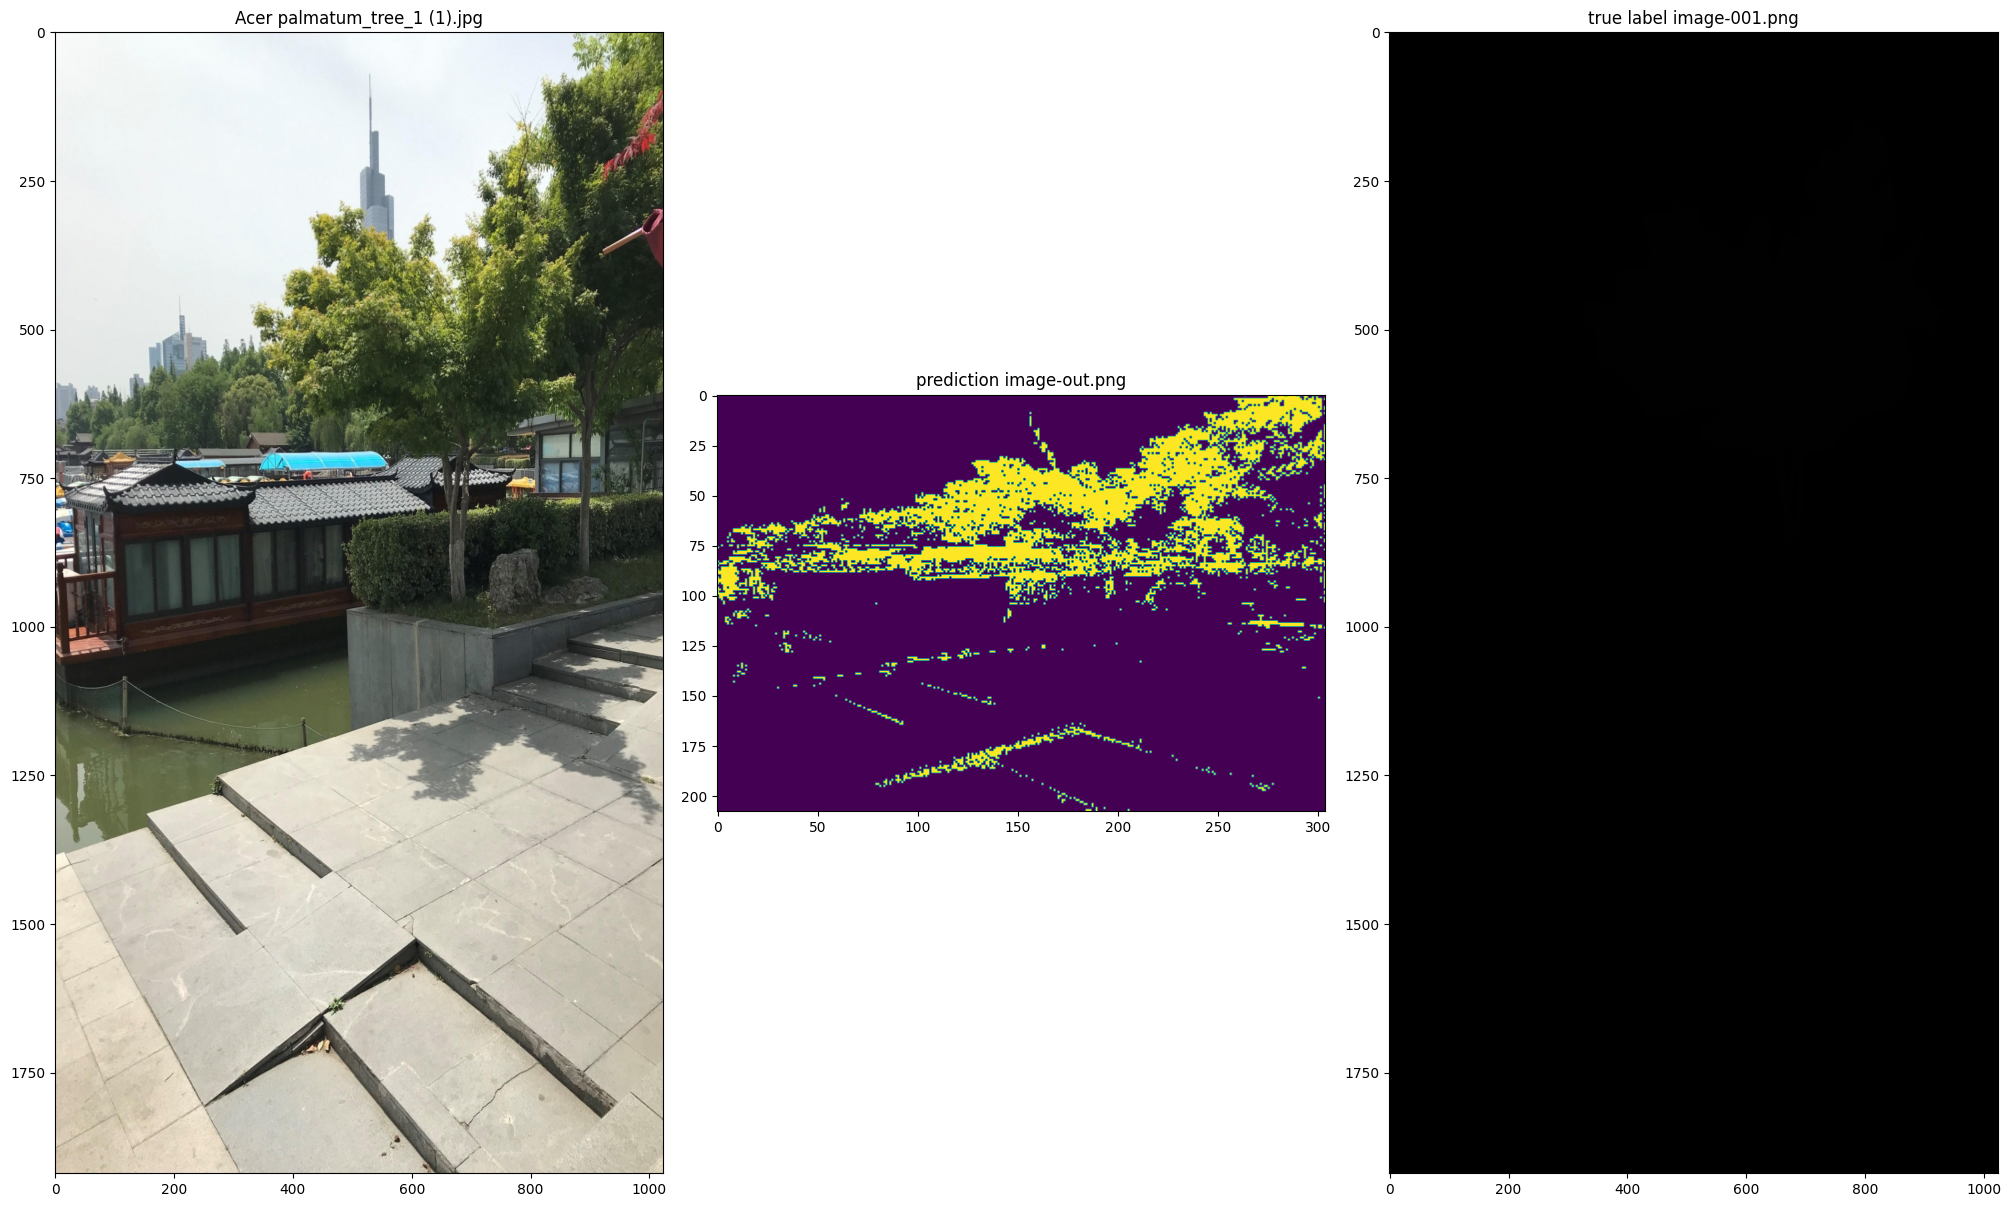

In [6]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "/home/hamster02/courses/ugp_1/Motion_induction/tree/VOCdevkit/VOC2012/JPEGImages/Acer palmatum_tree_1 (1).jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('Acer palmatum_tree_1 (1).jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/home/hamster02/courses/ugp_1/Motion_induction/tree/VOCdevkit/VOC2012/SegmentationClass/Acer palmatum_tree_1 (1).png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image-001.png')
axs[2].grid(False)

done = time.time()
elapsed = done - start